In [12]:
import numpy as np

h, theta = 500e3, 30

# Sidenote: true slant range associated to the looking angle

## INCOMPLETE. valid, but closed form can be gound in gerbert thesis
Using a spherical earth model, we find the slant range associated to the incidence angle theta.
1. we start finding the spherical earth range associated to the incidence angle inverting:
   \begin{equation}
   \Theta = \operatorname{atan}{\left(\frac{R_{E} \sin{\left(\frac{R_{G}}{R_{E}} \right)}}{H - R_{E} \cos{\left(\frac{R_{G}}{R_{E}} \right)} + R_{E}} \right)} + \frac{R_{G}}{R_{E}}
   \end{equation}
   $R_E$ = Earth radius, $R_G$ = ground range on sphere, H = orbital height

In [13]:
from numpy import arctan, tan, sin, cos
from scipy.optimize import fsolve


def theta_from_rg(rg, H, re=6371e3):
    """
    incidence angle given
    :param Rg: ground range on spherical earth
    :param Re: earth radius
    :param H: orbital height
    :return:
    """
    t = arctan(re * sin(rg / re) / (H - re * cos(rg / re) + re)) + rg / re
    return t


rg_initial_guess = h * tan(theta * np.pi / 180)
print('initial guess ', rg_initial_guess)
rg = fsolve(lambda r: theta_from_rg(r, h) - (theta * np.pi / 180), rg_initial_guess)
print('exact ground range ', rg)

initial guess  288675.1345948129
exact ground range  [264573.14284873]


    2. The exact slant range is then given by:
        \begin{equation}
            R = \dfrac{H - R_E  \cos\left(\frac{R_{G}}{R_{E}} \right) + R_E}{\cos\left( \Theta - \dfrac{R_G}{R_E}\right)}
        \end{equation}


In [14]:
def slant_range_spherical(H, th, rg, re=6371e3):
    """
    correct slant range for spherical earth
    :param H: orbital height
    :param th: incidence angle
    :param rg: ground range on spherical earth
    :param re: earth radius
    :return: correct slant range
    """
    ran = (H - re * cos(rg / re) + re) / (cos(th) - (rg / re))
    return ran


slant_range = slant_range_spherical(h, theta * np.pi / 180, rg)
print('slant range ', slant_range)

slant range  [613091.80695316]


# Altogether Now: slant range from incidence angle on spherical earth
specification: a function that given the looking angle returns the slant range (and the ground range perhaps)

orbial height, earth radius and propagation speed are passed as standard (hidden) parameters

In [15]:
from numpy import arctan, tan, sin, cos, vectorize, arctan2
from scipy.optimize import fsolve


def range_from_theta(Theta, h=500e3, re=6371e3):
    """
    returns the slant range and spherical earth ground range given the incidence angle
    :param Theta: incidence angle in degrees, must be between 0 and 90
    :param h: orbital height, default 500 km
    :param re: earth radius, default 6,371 km
    :return: (slant_range, ground_range)
    """
    ## step 1 find the ground range
    # equation to invert numerically (theta from ground range)
    th = lambda r_g: (arctan2(re * sin(r_g / re), (h - re * cos(r_g / re) + re)) + (r_g / re)) - (Theta * np.pi / 180)
    # intial guess for the solver
    rg_initial_guess = h * tan(Theta * np.pi / 180)
    # numerical solution
    rg = fsolve(th, rg_initial_guess)

    ## step 2 find the slant range
    r = (h + re - re * cos(rg / re)) / cos((Theta * np.pi / 180) - (rg / re))

    ## finally return all
    return r, rg



In [16]:
range_from_theta(89.10459,h=500,re=6371)

(array([2475.49480715]), array([2347.85733492]))

In [17]:
theta = np.linspace(0, 90, 100)

In [18]:
rs, rgg = range_from_theta(theta)

In [19]:
rs
rs.shape

(100,)

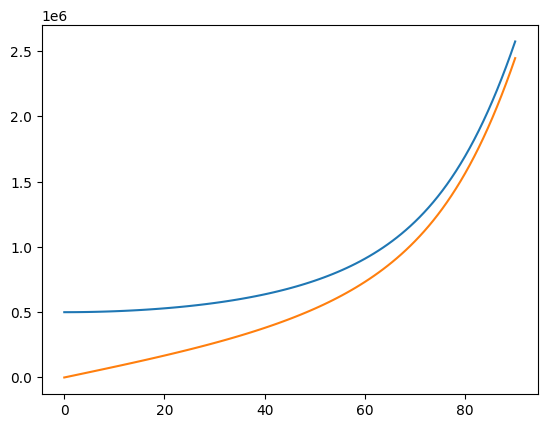

In [20]:
import matplotlib.pyplot as plt

plt.plot(theta, rs)
plt.plot(theta,rgg)